 Clasificación de Vinos - Proyecto Completo de Ciencia de Datos

# 🧪 Clasificación de Vinos - Proyecto Completo de Ciencia de Datos

Este notebook implementa un flujo completo de ciencia de datos usando el dataset de vinos de `scikit-learn`.

### Objetivo:
Predecir si un vino pertenece a la **clase 1** (target = 1) o no (target = 0), usando sus características químicas.

## Pasos:
1. Definición del problema  
2. Análisis exploratorio  
3. Limpieza y preprocesamiento  
4. Selección de modelos  
5. Evaluación de modelos  
6. Iteración y mejora

In [5]:
# Cargar el dataset desde sklearn
from sklearn.datasets import load_wine
import pandas as pd

wine_data = load_wine(as_frame=True)
df = wine_data.frame

# Convertir a clasificación binaria: 1 si es clase 1, 0 en caso contrario
df["target"] = df["target"].apply(lambda x: 1 if x == 1 else 0)

# Mostrar las primeras filas
df.head()
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## 📊 Paso 2: Análisis Exploratorio

Aquí exploramos la estructura y relaciones entre las variables:
- Distribución de la variable objetivo
- Correlaciones entre variables numéricas

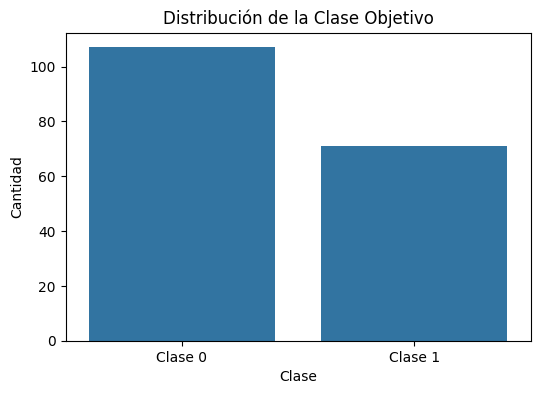

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la clase objetivo
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title('Distribución de la Clase Objetivo')
plt.xticks([0, 1], ['Clase 0', 'Clase 1'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

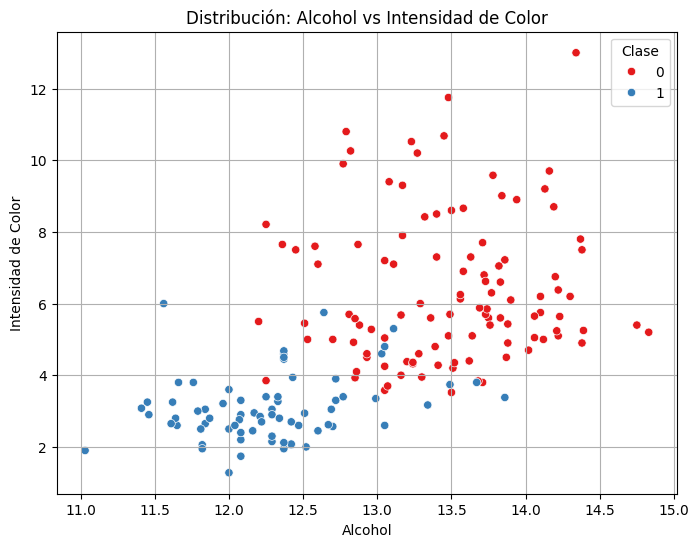

In [8]:
# Scatter plot básico: alcohol vs color_intensity, coloreado por clase
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="alcohol", y="color_intensity", hue="target", palette="Set1")
plt.title("Distribución: Alcohol vs Intensidad de Color")
plt.xlabel("Alcohol")
plt.ylabel("Intensidad de Color")
plt.legend(title="Clase")
plt.grid(True)
plt.show()

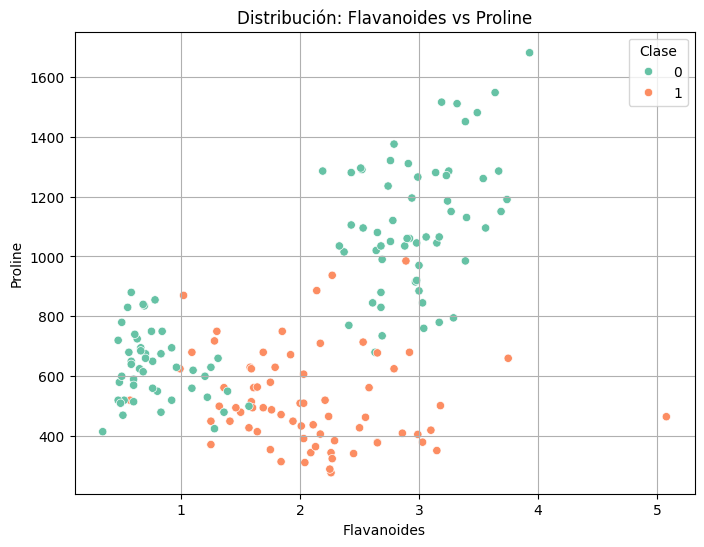

In [9]:
# Scatter plot: flavanoids vs proline
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="flavanoids", y="proline", hue="target", palette="Set2")
plt.title("Distribución: Flavanoides vs Proline")
plt.xlabel("Flavanoides")
plt.ylabel("Proline")
plt.legend(title="Clase")
plt.grid(True)
plt.show()

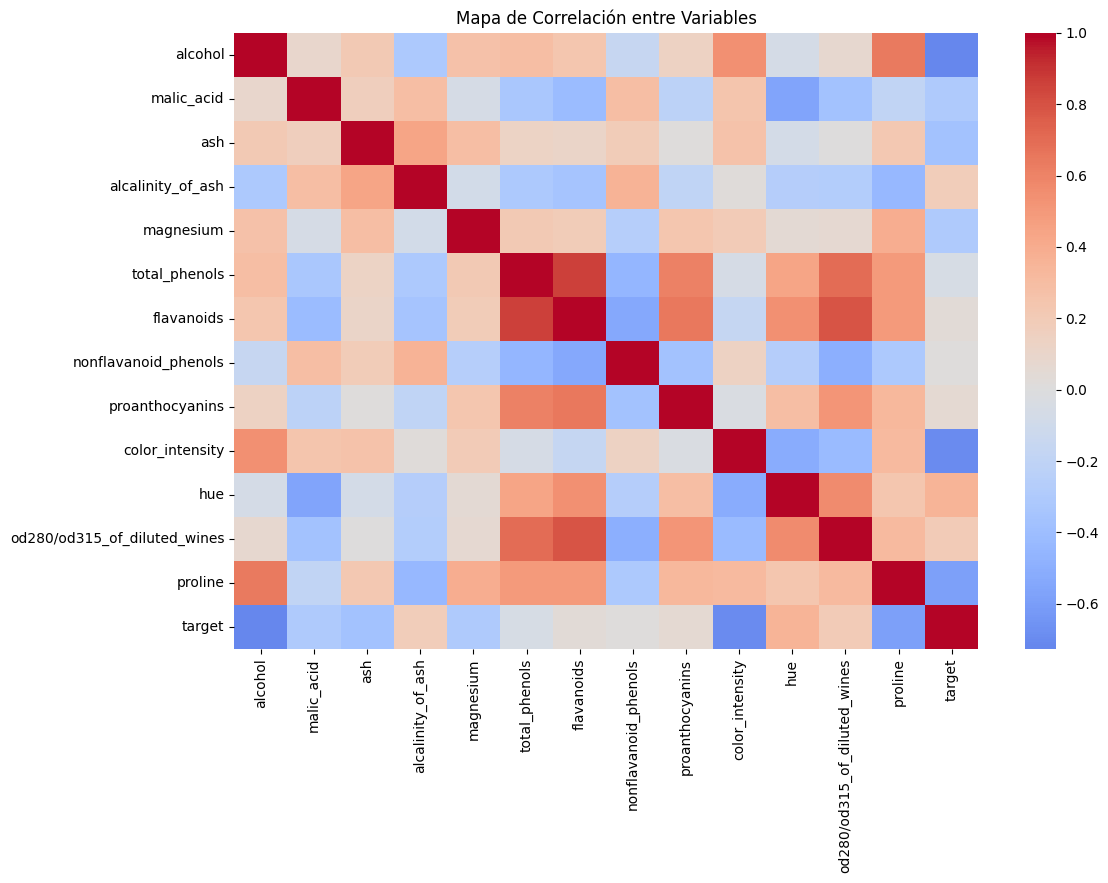

In [6]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Mapa de Correlación entre Variables')
plt.show()

## 🧹 Paso 3: Limpieza y Preprocesamiento

- Verificamos datos faltantes
- Escalamos los datos (para algoritmos sensibles a la escala)
- Dividimos en entrenamiento y prueba

In [7]:
# Verificar si hay datos faltantes
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [10]:
# Dividir en variables predictoras y objetivo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

Paso 4: Selección y Entrenamiento de Modelos
Vamos a comenzar entrenando varios modelos clásicos de clasificación y comparar sus rendimientos.

📋 Modelos que aplicaremos:
Regresión Logística

Árbol de Decisión

Random Forest

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

📈 Métricas que usaremos:
Accuracy (precisión) general

Matriz de confusión

Reporte de clasificación: precisión, recall, F1-score

Visualización comparativa entre modelos



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Lista de modelos a evaluar
modelos = {
    "Regresión Logística": LogisticRegression(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

resultados = {}

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    print(f"\n📌 Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))


📌 Modelo: Regresión Logística
Accuracy: 1.0000
Matriz de confusión:
[[22  0]
 [ 0 14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


📌 Modelo: Árbol de Decisión
Accuracy: 0.9722
Matriz de confusión:
[[22  0]
 [ 1 13]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36


📌 Modelo: Random Forest
Accuracy: 1.0000
Matriz de confusión:
[[22  0]
 [ 0 14]]
Reporte de clasificación:
            

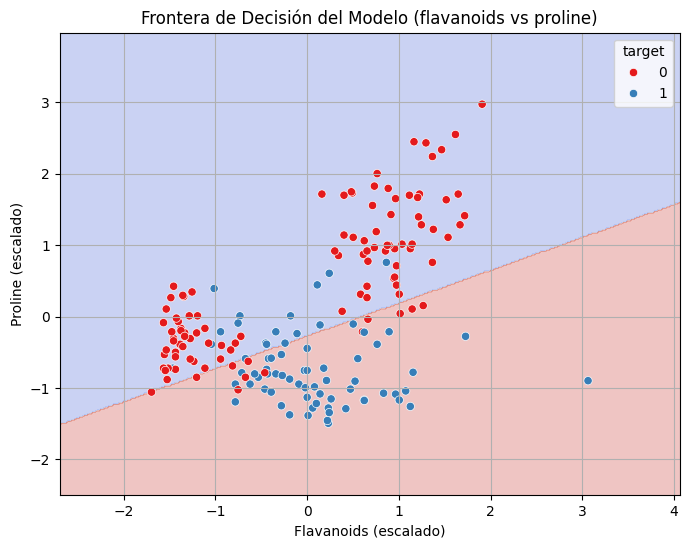

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Extraer solo 2 características
X_2d = df[["flavanoids", "proline"]]
y = df["target"]

# Escalar esas 2 variables
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Entrenar modelo simple con solo esas 2 variables
modelo_simple = LogisticRegression()
modelo_simple.fit(X_2d_scaled, y)

# Crear malla para graficar frontera de decisión
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = modelo_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_2d_scaled[:, 0], y=X_2d_scaled[:, 1], hue=y, palette="Set1")
plt.title("Frontera de Decisión del Modelo (flavanoids vs proline)")
plt.xlabel("Flavanoids (escalado)")
plt.ylabel("Proline (escalado)")
plt.grid(True)
plt.show()

Paso 5: Evaluación de Modelos
Ya entrenamos varios modelos (Regresión Logística, Árbol, Random Forest, SVM, KNN) y vimos sus métricas de desempeño (accuracy, precision, recall, etc.).

Ahora vamos a evaluarlos comparativamente y de forma visual, usando:

📊 Gráfico de barras de precisión

🔍 Reporte de clasificación para el mejor modelo

📉 Curva ROC (opcional pero útil en clasificación binaria)

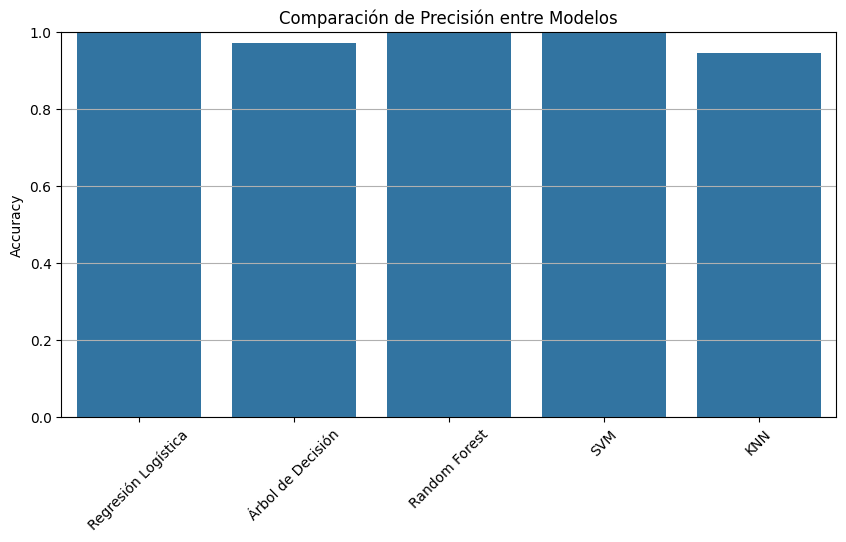

In [14]:
# Visualizar precisión de todos los modelos
plt.figure(figsize=(10, 5))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.title("Comparación de Precisión entre Modelos")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

In [15]:
# Encontrar el modelo con mejor accuracy
mejor_modelo = max(resultados, key=resultados.get)
print(f"✅ Modelo con mejor precisión: {mejor_modelo} ({resultados[mejor_modelo]:.2f})")

✅ Modelo con mejor precisión: Regresión Logística (1.00)


 Paso 6: Iteración y Mejora
Ahora que sabemos cuál es el modelo más prometedor, podemos:

✅ Probar mejoras como:
Ajuste de hiperparámetros con GridSearchCV

Usar más variables o eliminar algunas

Aplicar técnicas de reducción de dimensionalidad como PCA

Probar modelos más complejos (XGBoost, redes neuronales, etc.)

In [16]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor puntuación:", grid.best_score_)

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mejor puntuación: 0.9859605911330049
